In [2]:
import numpy as np
import LDA
import QDA
import NB
import matplotlib.pyplot as plt
import importlib

importlib.reload(LDA)
importlib.reload(QDA)
importlib.reload(NB)

<module 'NB' from '/home/dawid/repos/advanced_ml_labs/task_1/NB.py'>

# Test LDA

In [33]:
n = 1000

a = 1

y = np.random.binomial(n=1, p=0.5, size=n)
y.sort()
n0 = np.sum(y == 0)
n1 = np.sum(y == 1)
X_0 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=n0)
X_1 = np.random.multivariate_normal(mean=[a, a], cov=[[1, 0], [0, 1]], size=n1)
X = np.concat([X_0, X_1])

In [34]:
lda = LDA.BinaryLDA()
lda.fit(X, y)

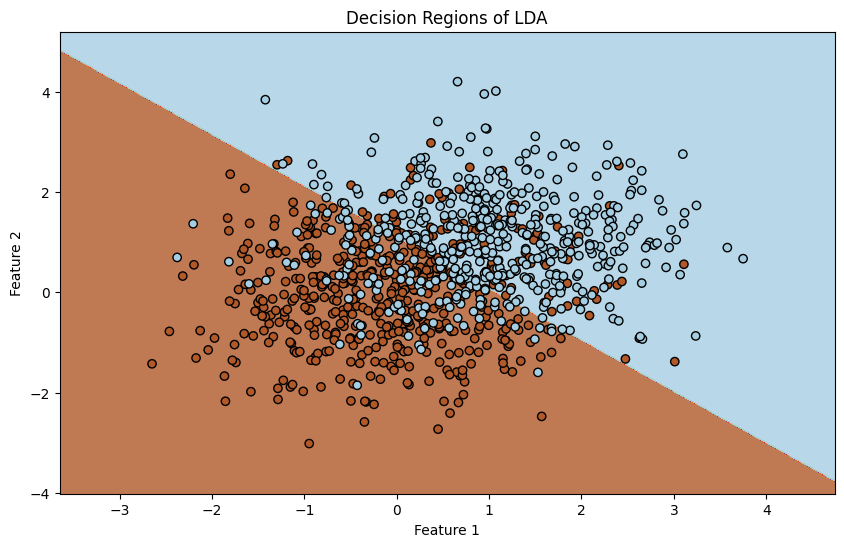

In [39]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
Z = lda.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired_r)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of LDA')
plt.show()

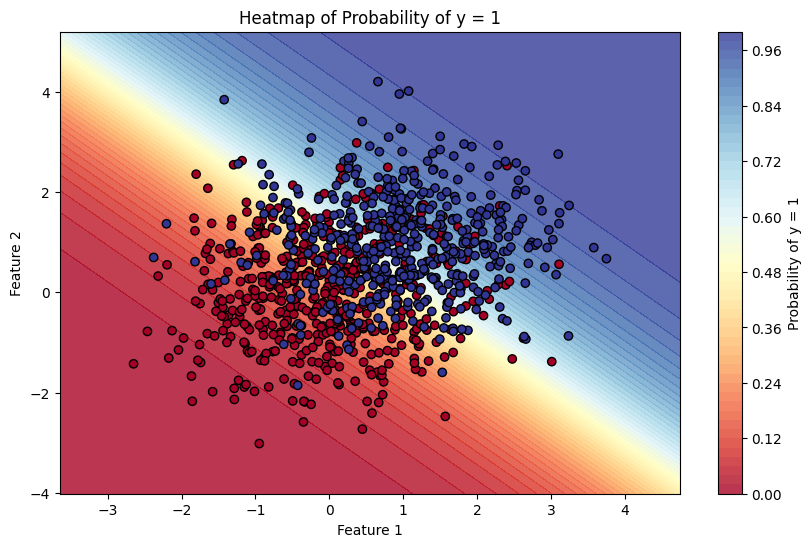

In [36]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the probability of y = 1 for each point in the grid
proba = lda.predict_proba(grid_points)  # Probability of class 1
proba = proba.reshape(xx.shape)

# Plot the heatmap of probabilities
plt.figure(figsize=(10, 6))
heatmap = plt.contourf(xx, yy, proba, levels=50, cmap='RdYlBu', alpha=0.8)
plt.colorbar(heatmap, label='Probability of y = 1')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='RdYlBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heatmap of Probability of y = 1')
plt.show()

# QDA

In [34]:
n = 1000
a = 3

cov_0 = np.array([[1, 0.5], [0.5, 1]])
cov_1 = np.array([[1, -0.5], [-0.5, 1]])

mean_0 = np.array([0, 0])
mean_1 = np.array([a, a])


y = np.random.binomial(n=1, p=0.5, size=n)
y.sort()
n0 = np.sum(y == 0)
n1 = np.sum(y == 1)
X_0 = np.random.multivariate_normal(mean=mean_0, cov=cov_0, size=n0)
X_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=n1)
X = np.concat([X_0, X_1])

In [35]:
qda = QDA.BinaryQDA()
qda.fit(X, y)

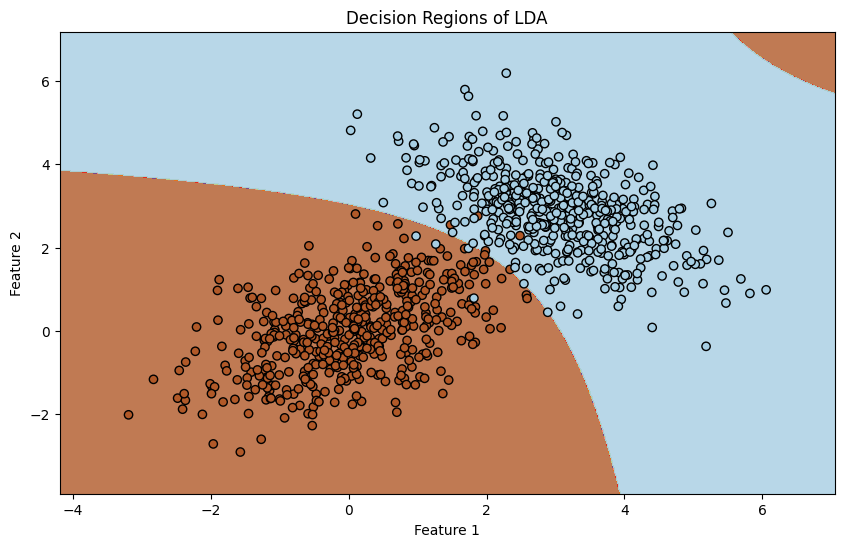

In [36]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
Z = qda.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired_r)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of LDA')
plt.show()

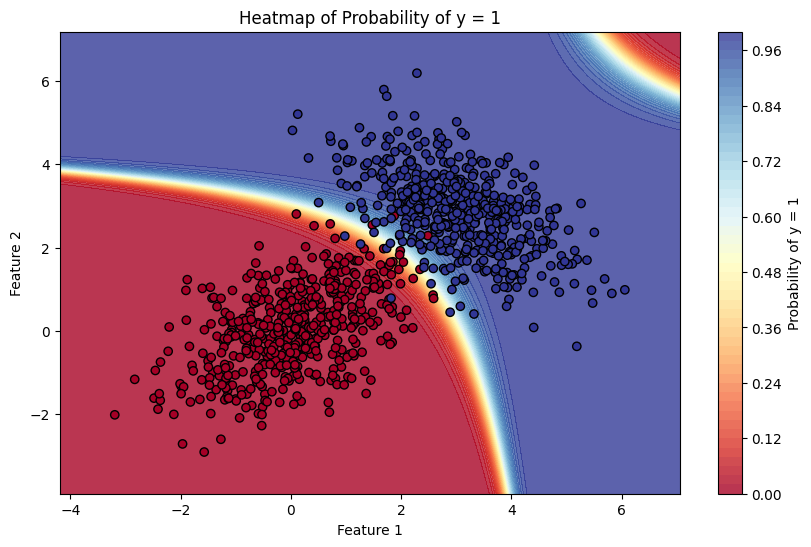

In [37]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the probability of y = 1 for each point in the grid
proba = qda.predict_proba(grid_points)  # Probability of class 1
proba = proba.reshape(xx.shape)

# Plot the heatmap of probabilities
plt.figure(figsize=(10, 6))
heatmap = plt.contourf(xx, yy, proba, levels=50, cmap='RdYlBu', alpha=0.8)
plt.colorbar(heatmap, label='Probability of y = 1')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='RdYlBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heatmap of Probability of y = 1')
plt.show()

In [38]:
qda.get_params()

[array([[1.07483602, 0.54674962],
        [0.54674962, 1.04804507]]),
 array([[ 0.99630037, -0.50547896],
        [-0.50547896,  0.92871644]]),
 array([0.0469992 , 0.04756633]),
 array([3.03697854, 2.86096455]),
 0.502,
 0.498]

# Naive Bayes

In [4]:
n = 1000
a = 3

cov_0 = np.array([[1, 0.5], [0.5, 1]])
cov_1 = np.array([[1, -0.5], [-0.5, 1]])

mean_0 = np.array([0, 0])
mean_1 = np.array([a, a])


y = np.random.binomial(n=1, p=0.5, size=n)
y.sort()
n0 = np.sum(y == 0)
n1 = np.sum(y == 1)
X_0 = np.random.multivariate_normal(mean=mean_0, cov=cov_0, size=n0)
X_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=n1)
X = np.concat([X_0, X_1])

In [5]:
nb = NB.BinaryNB()
nb.fit(X, y)

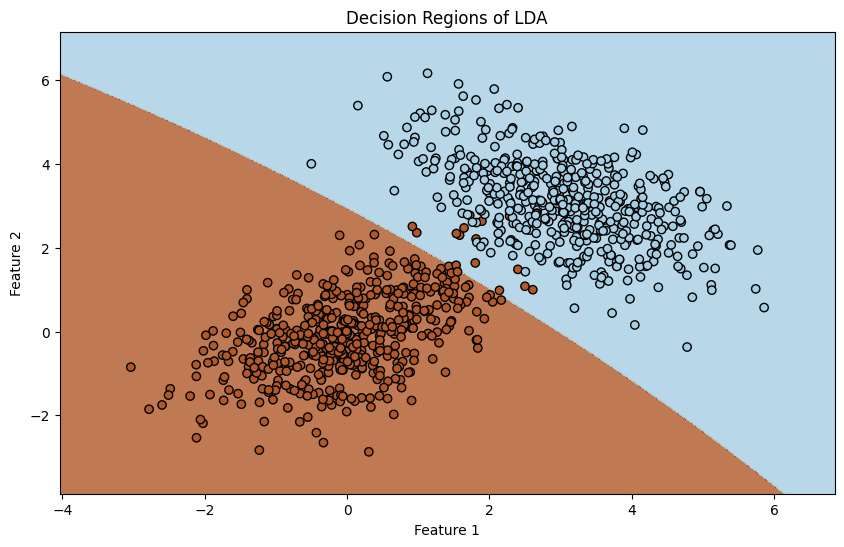

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
Z = nb.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired_r)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of LDA')
plt.show()

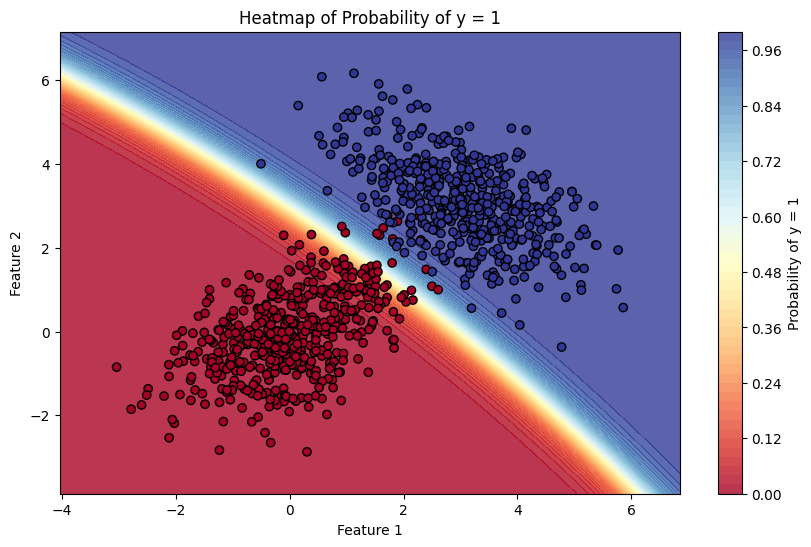

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the probability of y = 1 for each point in the grid
proba = nb.predict_proba(grid_points)  # Probability of class 1
proba = proba.reshape(xx.shape)

# Plot the heatmap of probabilities
plt.figure(figsize=(10, 6))
heatmap = plt.contourf(xx, yy, proba, levels=50, cmap='RdYlBu', alpha=0.8)
plt.colorbar(heatmap, label='Probability of y = 1')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='RdYlBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heatmap of Probability of y = 1')
plt.show()